In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data = pd.read_excel('data/HR_comma_sep.xlsx')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['salary'] = le.fit_transform(data['salary'])
data['sales'] = le.fit_transform(data['sales'])

## EDA

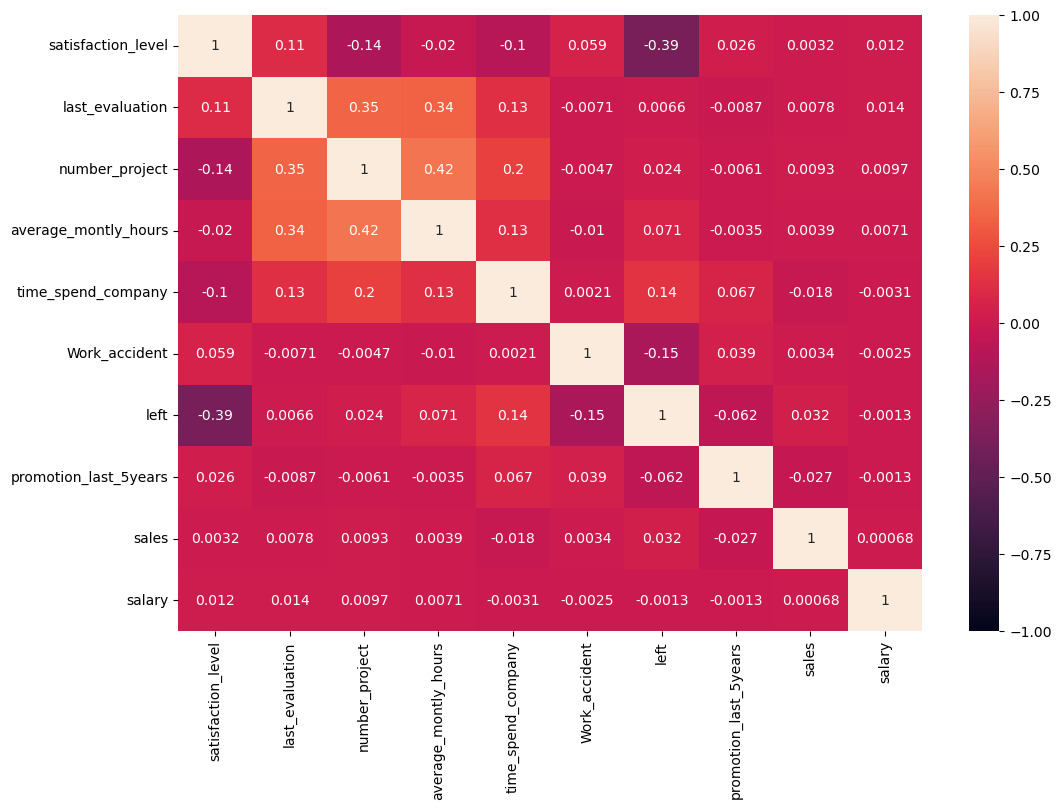

In [35]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1)
plt.show()

array([[<Axes: title={'center': 'satisfaction_level'}>,
        <Axes: title={'center': 'last_evaluation'}>,
        <Axes: title={'center': 'number_project'}>],
       [<Axes: title={'center': 'average_montly_hours'}>,
        <Axes: title={'center': 'time_spend_company'}>,
        <Axes: title={'center': 'Work_accident'}>],
       [<Axes: title={'center': 'left'}>,
        <Axes: title={'center': 'promotion_last_5years'}>,
        <Axes: title={'center': 'sales'}>],
       [<Axes: title={'center': 'salary'}>, <Axes: >, <Axes: >]],
      dtype=object)

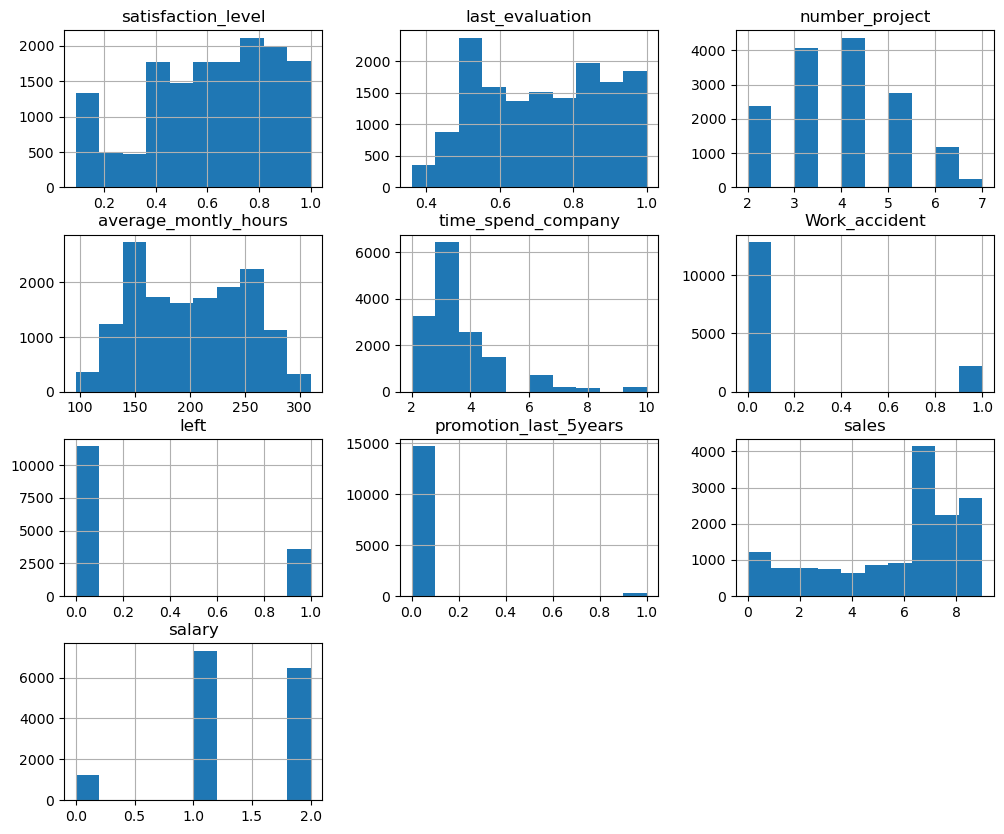

In [36]:
data.hist(figsize=(12,10))

<Axes: >

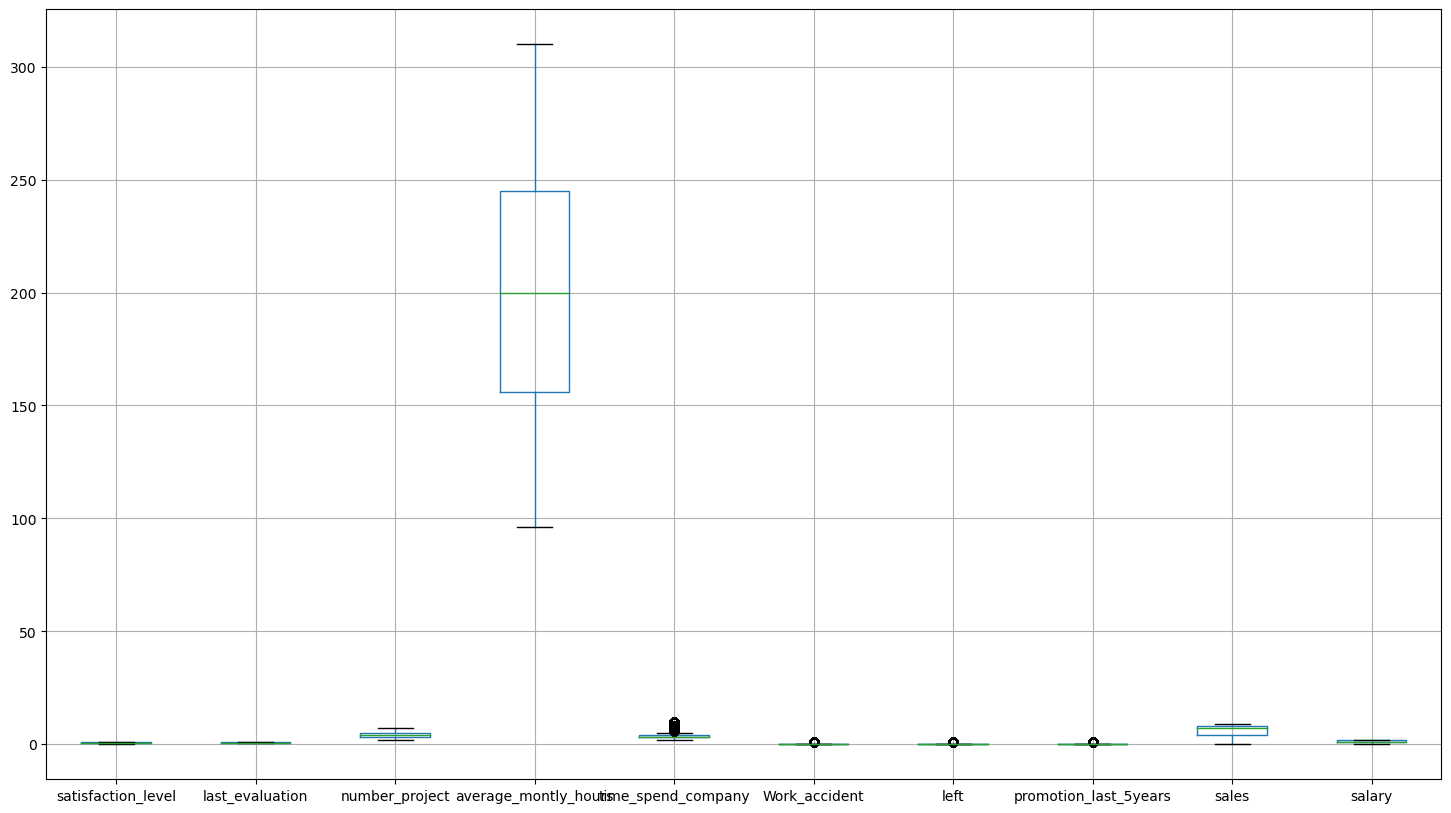

In [37]:
data.boxplot(figsize=(18,10))

In [38]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1:].values

In [39]:
x

array([[0.38, 0.53, 2.  , ..., 1.  , 0.  , 7.  ],
       [0.8 , 0.86, 5.  , ..., 1.  , 0.  , 7.  ],
       [0.11, 0.88, 7.  , ..., 1.  , 0.  , 7.  ],
       ...,
       [0.37, 0.53, 2.  , ..., 1.  , 0.  , 8.  ],
       [0.11, 0.96, 6.  , ..., 1.  , 0.  , 8.  ],
       [0.37, 0.52, 2.  , ..., 1.  , 0.  , 8.  ]])

<Axes: xlabel='salary', ylabel='count'>

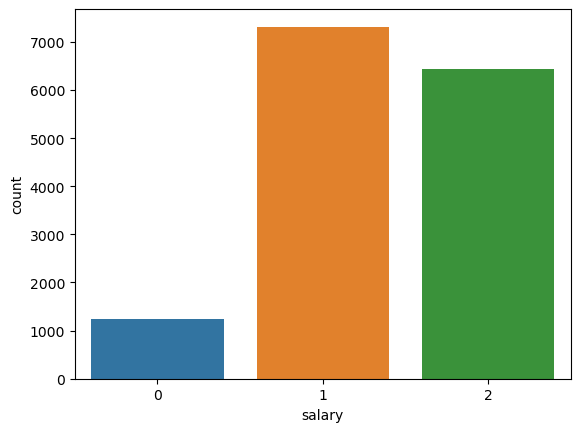

In [40]:
sns.countplot(x='salary', data=data)

In [41]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size =0.25,random_state = 2)

In [74]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Gaussian Naive Baye

gauss_nb = GaussianNB()
gauss_nb.fit(xtrain,ytrain)

gauss_pred = gauss_nb.predict(xtest)

# performance metric

print("Accuracy score :\t",accuracy_score(ytest,gauss_pred))
print()
print('Confusion Martix :\n',confusion_matrix(ytest,gauss_pred))
print()
print('classification Report :\n', classification_report(ytest,gauss_pred))

Accuracy score :	 0.4962666666666667

Confusion Martix :
 [[  36  249    9]
 [  50 1788   19]
 [  85 1477   37]]

classification Report :
               precision    recall  f1-score   support

           0       0.21      0.12      0.15       294
           1       0.51      0.96      0.67      1857
           2       0.57      0.02      0.04      1599

    accuracy                           0.50      3750
   macro avg       0.43      0.37      0.29      3750
weighted avg       0.51      0.50      0.36      3750



C:\Users\2001s\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [75]:
# Multinomial Naive Baye

from sklearn.naive_bayes import MultinomialNB

multi_nb = MultinomialNB()
multi_nb.fit(xtrain,ytrain)

multi_pred = multi_nb.predict(xtest)

print("Accuracy score :\t",accuracy_score(ytest,multi_pred))
print()
print('Confusion Martix :\n',confusion_matrix(ytest,multi_pred))
print()
print('classification Report :\n', classification_report(ytest,multi_pred))

Accuracy score :	 0.5021333333333333

Confusion Martix :
 [[   0  185  109]
 [   0 1476  381]
 [   0 1192  407]]

classification Report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       294
           1       0.52      0.79      0.63      1857
           2       0.45      0.25      0.33      1599

    accuracy                           0.50      3750
   macro avg       0.32      0.35      0.32      3750
weighted avg       0.45      0.50      0.45      3750



C:\Users\2001s\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\2001s\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\2001s\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\2001s\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarni

In [76]:
#Bernoulli  Naive Baye

from sklearn.naive_bayes import BernoulliNB

ber_nb = BernoulliNB()
ber_nb.fit(xtrain,ytrain)

ber_pred = ber_nb.predict(xtest)

print("Accuracy score :\t",accuracy_score(ytest,ber_pred))
print()
print('Confusion Martix :\n',confusion_matrix(ytest,ber_pred))
print()
print('classification Report :\n', classification_report(ytest,ber_pred))

Accuracy score :	 0.5016

Confusion Martix :
 [[   0  275   19]
 [   0 1839   18]
 [   0 1557   42]]

classification Report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       294
           1       0.50      0.99      0.67      1857
           2       0.53      0.03      0.05      1599

    accuracy                           0.50      3750
   macro avg       0.34      0.34      0.24      3750
weighted avg       0.47      0.50      0.35      3750



C:\Users\2001s\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\2001s\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\2001s\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\2001s\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarni

## Ensemble Model

#### 1. Bagging Classifier

In [48]:
from sklearn.ensemble import BaggingClassifier
bagc = BaggingClassifier(base_estimator=gauss_nb,n_estimators=10,random_state=1)

bagc.fit(xtrain,ytrain)
bagc_pred  = bagc.predict(xtest)

print("Accuracy score :\t",accuracy_score(ytest,bagc_pred))
print()
print('Confusion Martix :\n',confusion_matrix(ytest,bagc_pred))
print()
print('classification Report :\n', classification_report(ytest,bagc_pred))


Accuracy score :	 0.4965333333333333

Confusion Martix :
 [[  36  248   10]
 [  50 1785   22]
 [  85 1473   41]]

classification Report :
               precision    recall  f1-score   support

           0       0.21      0.12      0.15       294
           1       0.51      0.96      0.67      1857
           2       0.56      0.03      0.05      1599

    accuracy                           0.50      3750
   macro avg       0.43      0.37      0.29      3750
weighted avg       0.51      0.50      0.36      3750



C:\Users\2001s\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\2001s\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


### 2. RandomForest Classifier Model

In [51]:
from sklearn.ensemble import RandomForestClassifier
ranc = RandomForestClassifier(n_estimators=10,random_state=1)

ranc.fit(xtrain,ytrain)
ranc_pred  = ranc.predict(xtest)

print("Accuracy score :\t",accuracy_score(ytest,ranc_pred))
print()
print('Confusion Martix :\n',confusion_matrix(ytest,ranc_pred))
print()
print('classification Report :\n', classification_report(ytest,ranc_pred))

C:\Users\2001s\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy score :	 0.6112

Confusion Martix :
 [[  87  127   80]
 [  31 1322  504]
 [  30  686  883]]

classification Report :
               precision    recall  f1-score   support

           0       0.59      0.30      0.39       294
           1       0.62      0.71      0.66      1857
           2       0.60      0.55      0.58      1599

    accuracy                           0.61      3750
   macro avg       0.60      0.52      0.54      3750
weighted avg       0.61      0.61      0.60      3750



In [54]:
from sklearn.ensemble import RandomForestClassifier
ranc = RandomForestClassifier(n_estimators=10,random_state=1,max_features=5)

ranc.fit(xtrain,ytrain)
ranc_pred  = ranc.predict(xtest)

print("Accuracy score :\t",accuracy_score(ytest,ranc_pred))
print()
print('Confusion Martix :\n',confusion_matrix(ytest,ranc_pred))
print()
print('classification Report :\n', classification_report(ytest,ranc_pred))

C:\Users\2001s\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy score :	 0.6154666666666667

Confusion Martix :
 [[  90  123   81]
 [  31 1368  458]
 [  36  713  850]]

classification Report :
               precision    recall  f1-score   support

           0       0.57      0.31      0.40       294
           1       0.62      0.74      0.67      1857
           2       0.61      0.53      0.57      1599

    accuracy                           0.62      3750
   macro avg       0.60      0.52      0.55      3750
weighted avg       0.61      0.62      0.61      3750



In [70]:
from sklearn.ensemble import ExtraTreesClassifier
ex = ExtraTreesClassifier(n_estimators=10,bootstrap=True,verbose=2)

ex.fit(xtrain,ytrain)

ex_pred  = ex.predict(xtest)
print()
print("Accuracy score :\t",accuracy_score(ytest,ex_pred))
print()
print('Confusion Martix :\n',confusion_matrix(ytest,ex_pred))
print()
print('classification Report :\n', classification_report(ytest,ex_pred))

C:\Users\2001s\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10

Accuracy score :	 0.612

Confusion Martix :
 [[  92  122   80]
 [  41 1339  477]
 [  39  696  864]]

classification Report :
               precision    recall  f1-score   support

           0       0.53      0.31      0.39       294
           1       0.62      0.72      0.67      1857
           2       0.61      0.54      0.57      1599

    accuracy                           0.61      3750
   macro avg       0.59      0.52      0.54      3750
weighted avg       0.61      0.61      0.61      3750



[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


# Boosting - Adaboost with base model

In [67]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score,mean_squared_error

In [72]:
linear_reg = LinearRegression()
ada = AdaBoostRegressor(base_estimator=linear_reg,n_estimators=15)
ada.fit(xtrain,ytrain)
ada_pred = ada.predict(xtest)

print("Accuracy score :\t",r2_score(ytest,ada_pred))
print()
print('Mean squared Error :\t',mean_squared_error(ytest,ada_pred))
print()
print('RMSE :\t', np.sqrt(mean_squared_error(ytest,ada_pred)))

Accuracy score :	 -0.004264650198310349

Mean squared Error :	 0.38533232922249094

RMSE :	 0.620751423053134


C:\Users\2001s\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\2001s\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


## Boosting - GradientBoot

In [73]:
from sklearn.ensemble import GradientBoostingRegressor


grad = GradientBoostingRegressor(n_estimators=15)
grad.fit(xtrain,ytrain)
grad_pred = grad.predict(xtest)

print("Accuracy score :\t",r2_score(ytest,grad_pred))
print()
print('Mean squared Error :\t',mean_squared_error(ytest,grad_pred))
print()
print('RMSE :\t', np.sqrt(mean_squared_error(ytest,grad_pred)))

C:\Users\2001s\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score :	 0.01842515110000109

Mean squared Error :	 0.376626343223534

RMSE :	 0.6136989027393922


#### Model With Accuracy Score

In [1]:
print("GaussianNB Accuracy score :\t",accuracy_score(ytest,gauss_pred))
print()
print("Multinomial Accuracy score :\t",accuracy_score(ytest,multi_pred))
print()
print("Bernoli Accuracy score :\t",accuracy_score(ytest,ber_pred))
print()
print("Bagging Classifier Accuracy score :\t",accuracy_score(ytest,bagc_pred))
print()
print("RandomForest Accuracy score :\t",accuracy_score(ytest,ranc_pred))
print()
print("ExtraTree Accuracy score :\t",accuracy_score(ytest,ex_pred))
print()
print("AdaBoost Accuracy score :\t",r2_score(ytest,ada_pred))
print()
print("GradientBoost Accuracy score :\t",r2_score(ytest,grad_pred))

NameError: name 'accuracy_score' is not defined